/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 72.5240 - mae: 8.1296 - val_loss: 97.4969 - val_mae: 9.1649 - learning_rate: 0.0030
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.3194 - mae: 6.1392 - val_loss: 280.2153 - val_mae: 13.0894 - learning_rate: 0.0030
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.7138 - mae: 3.6841 - val_loss: 547.9106 - val_mae: 20.7974 - learning_rate: 0.0030
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 49.3042 - mae: 4.1376 - val_loss: 191.6595 - val_mae: 11.8727 - learning_rate: 0.0030
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 58.2546 - mae: 6.4291 - val_loss: 71.1742 - val_mae: 7.6982 - learning_rate: 0.0030
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 44.9015 - mae: 5.6130 - val_loss: 267.9077 - val_mae: 16.3257 - learning_rate: 0.0030
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32.5282 - mae: 5.1842 - val_loss: 180.1444 - val_mae: 13.357

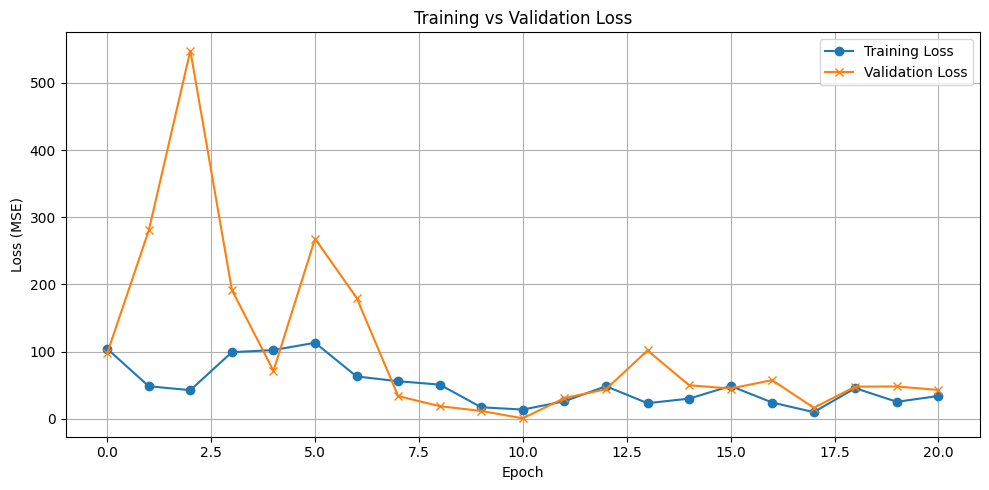

         loss       mae    val_loss    val_mae  learning_rate
0  104.053352  9.306560   97.496895   9.164874          0.003
1   48.267963  6.050909  280.215302  13.089367          0.003
2   42.443920  5.558285  547.910645  20.797430          0.003
3   99.056908  6.889814  191.659485  11.872699          0.003
4  102.112709  8.702725   71.174225   7.698154          0.003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 0.4985 - mae: 0.5244
Test MSE: 0.50, MAE: 0.52
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
R² Score: -2.6773
 Tahun  Aktual  Prediksi
  2022    19.5 19.298351
  2023    20.4 21.592810
  2024    20.0 19.821127


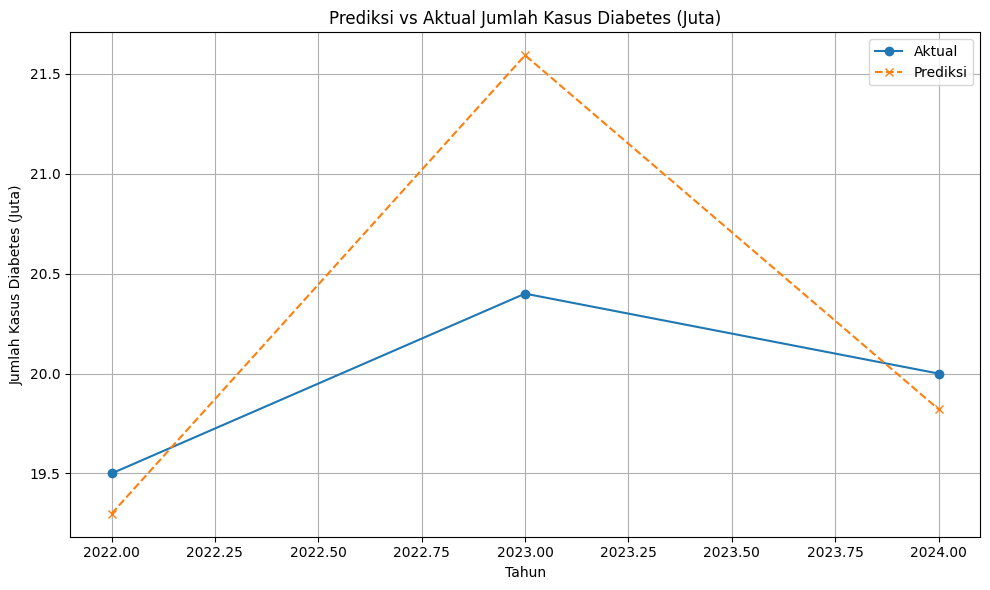

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
[Seluruh Tahun] MSE: 5.83, MAE: 1.61


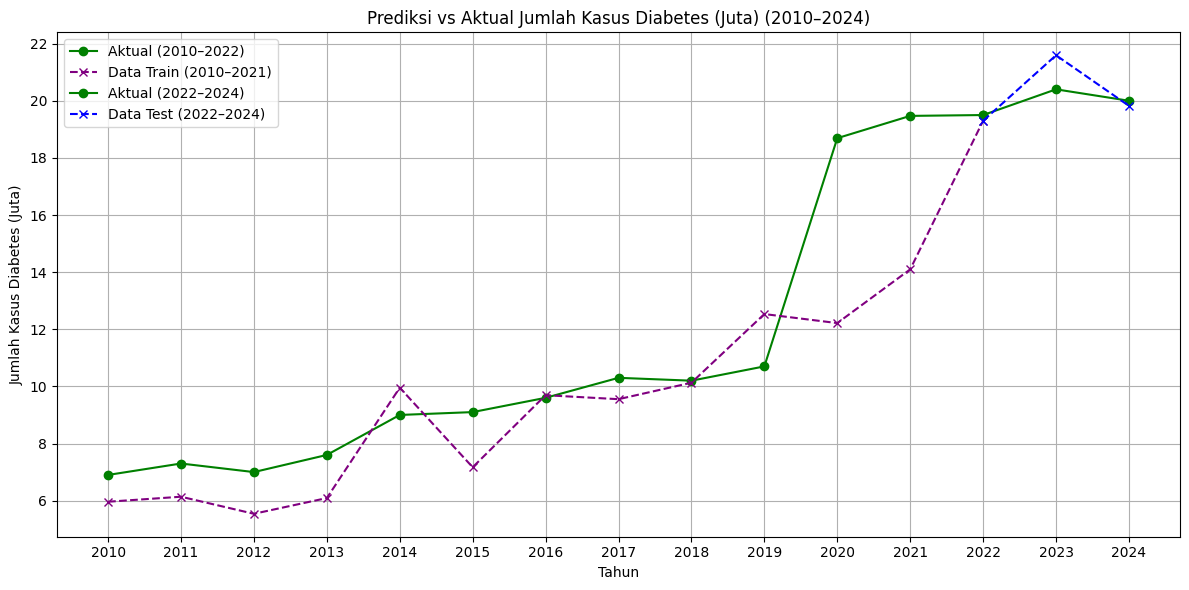

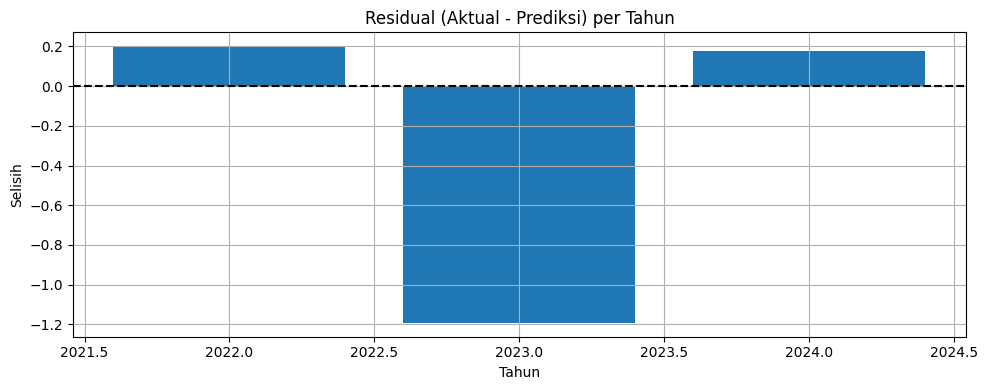

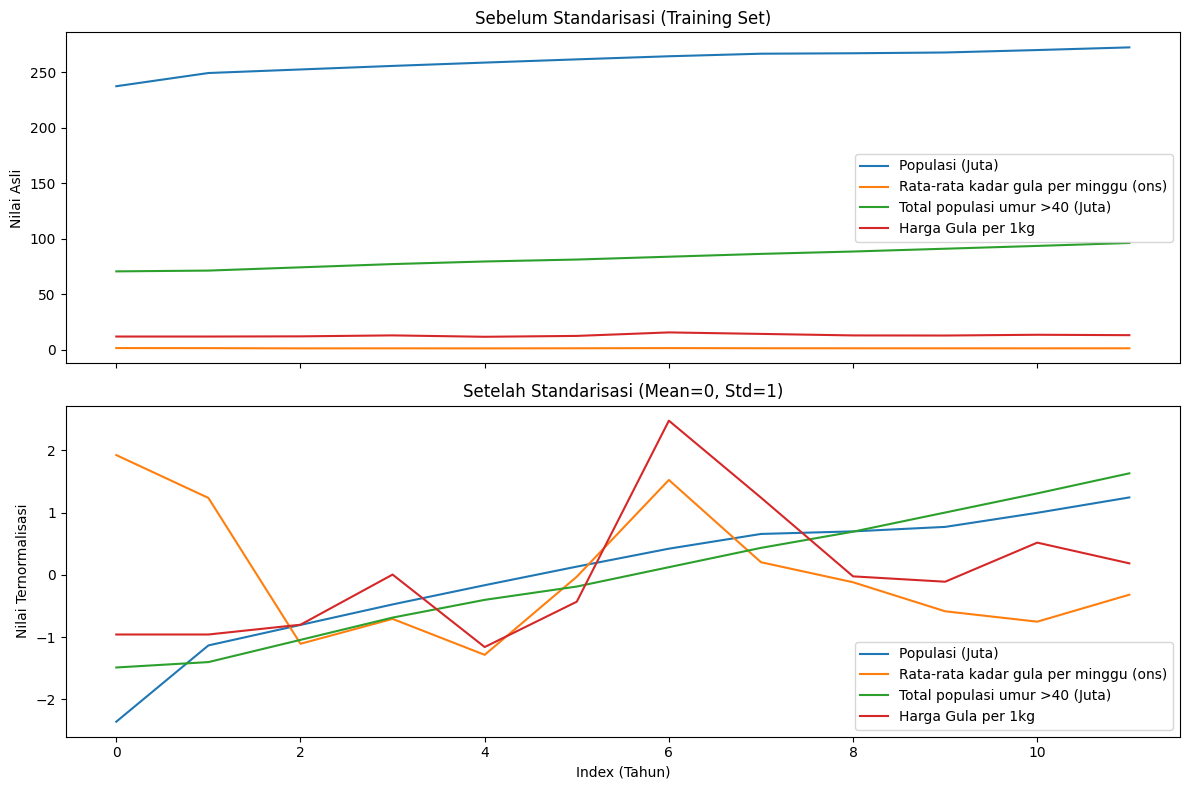

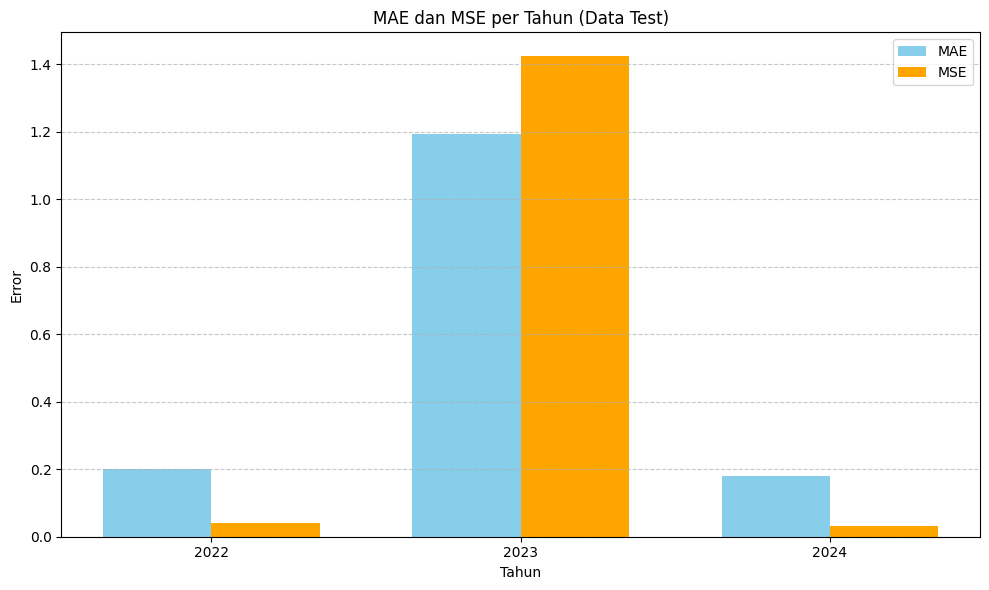

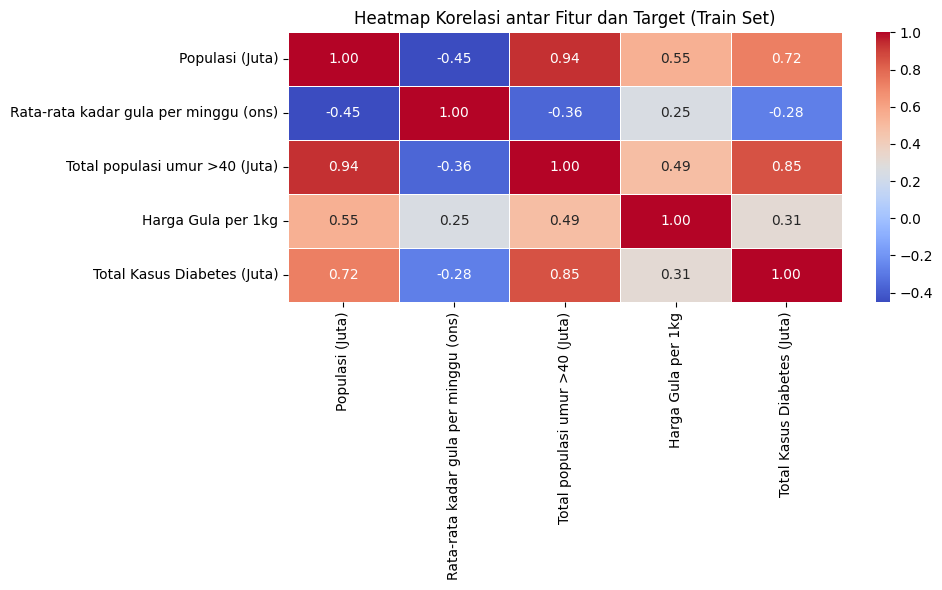

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.losses import Huber
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import numpy as np

import os
import random
import numpy as np
import tensorflow as tf

def set_seed(seed=16):
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'  # Untuk operasi deterministik
    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # Optional: disable GPU (jika mau 100% reproducible)

    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seed(16)

# Load dan bersihkan data
df = pd.read_csv("/content/Database Saindattt.csv")
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)

df

X_train = df[df['Tahun'] < 2022].drop(columns=['Tahun', 'Total Kasus Diabetes (Juta)'])
y_train = df[df['Tahun'] < 2022]['Total Kasus Diabetes (Juta)']

X_test = df[df['Tahun'] >= 2022].drop(columns=['Tahun', 'Total Kasus Diabetes (Juta)'])
y_test = df[df['Tahun'] >= 2022]['Total Kasus Diabetes (Juta)']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-10, verbose=1)

# Define model
model = Sequential([
    Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),

    Dense(5, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='linear')
])

# Compile model
model.compile(optimizer=SGD(learning_rate=0.003), loss='mean_squared_error', metrics=['mae'])
print(model.summary())

# Train model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=1000,
    batch_size=1,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# === Plot Training Loss vs Validation Loss ===
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Buat DataFrame dari history
df_history = pd.DataFrame(history.history)

# Simpan ke file CSV
df_history.to_csv("history.csv", index_label="Epoch")

# Tampilkan 5 baris pertama untuk dicek
print(df_history.head())

# Evaluate
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MSE: {loss:.2f}, MAE: {mae:.2f}")

# Predict
y_pred = model.predict(X_test_scaled).flatten()
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Create result DataFrame
df_result = pd.DataFrame({
    "Tahun": df.iloc[y_test.index]["Tahun"].values,
    "Aktual": y_test.values,
    "Prediksi": y_pred
}).sort_values("Tahun")

print(df_result.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_result["Tahun"], df_result["Aktual"], marker='o', label='Aktual')
plt.plot(df_result["Tahun"], df_result["Prediksi"], marker='x', linestyle='--', label='Prediksi')
plt.title("Prediksi vs Aktual Jumlah Kasus Diabetes (Juta)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kasus Diabetes (Juta)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Prediksi untuk semua tahun
X_all = df.drop(columns=['Tahun', 'Total Kasus Diabetes (Juta)'])
X_all_scaled = scaler.transform(X_all)
y_all_pred = model.predict(X_all_scaled).flatten()
mse_all = mean_squared_error(df["Total Kasus Diabetes (Juta)"], y_all_pred)
mae_all = mean_absolute_error(df["Total Kasus Diabetes (Juta)"], y_all_pred)

print(f"[Seluruh Tahun] MSE: {mse_all:.2f}, MAE: {mae_all:.2f}")

# Buat DataFrame hasil seluruh tahun
df_full = pd.DataFrame({
    "Tahun": df["Tahun"],
    "Aktual": df["Total Kasus Diabetes (Juta)"],
    "Prediksi": y_all_pred
})

#plot smua taun
plt.figure(figsize=(12, 6))

# Garis data 2010–2021
df_historis = df_full[df_full["Tahun"] <= 2022]
plt.plot(df_historis["Tahun"], df_historis["Aktual"], marker='o', label='Aktual (2010–2022)', color='green')
plt.plot(df_historis["Tahun"], df_historis["Prediksi"], marker='x', linestyle='--', label='Data Train (2010–2021)', color='purple')

# Garis data 2022–2024 (diberi warna beda)
df_future = df_full[df_full["Tahun"] >= 2022]
plt.plot(df_future["Tahun"], df_future["Aktual"], marker='o', label='Aktual (2022–2024)', color='green')
plt.plot(df_future["Tahun"], df_future["Prediksi"], marker='x', linestyle='--', label='Data Test (2022–2024)', color='blue')

# Format
plt.title("Prediksi vs Aktual Jumlah Kasus Diabetes (Juta) (2010–2024)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kasus Diabetes (Juta)")
plt.xticks(df_full["Tahun"])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = df_result["Aktual"] - df_result["Prediksi"]
plt.figure(figsize=(10, 4))
plt.bar(df_result["Tahun"], residuals)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual (Aktual - Prediksi) per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Selisih")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Visualisasi Standarisasi ===
# Buat DataFrame sebelum dan sesudah standarisasi
df_train_raw = pd.DataFrame(X_train.values, columns=X_train.columns)
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Plot sebelum dan sesudah standarisasi
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Sebelum Standarisasi
df_train_raw.plot(ax=axes[0], title='Sebelum Standarisasi (Training Set)')
axes[0].set_ylabel('Nilai Asli')

# Setelah Standarisasi
df_train_scaled.plot(ax=axes[1], title='Setelah Standarisasi (Mean=0, Std=1)')
axes[1].set_ylabel('Nilai Ternormalisasi')
axes[1].set_xlabel('Index (Tahun)')

plt.tight_layout()
plt.show()

# Filter hanya tahun data test
df_test = df_result[df_result["Tahun"] >= 2022]

# Hitung MSE & MAE per tahun
tahun = df_test["Tahun"].values
mse_per_year = []
mae_per_year = []

for t in tahun:
    y_true = df_test[df_test["Tahun"] == t]["Aktual"]
    y_pred = df_test[df_test["Tahun"] == t]["Prediksi"]
    mse_per_year.append(mean_squared_error(y_true, y_pred))
    mae_per_year.append(mean_absolute_error(y_true, y_pred))

# Bar plot
x = range(len(tahun))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, mae_per_year, width=width, label='MAE', color='skyblue')
plt.bar([i + width for i in x], mse_per_year, width=width, label='MSE', color='orange')
plt.xticks([i + width/2 for i in x], tahun)
plt.title("MAE dan MSE per Tahun (Data Test)")
plt.xlabel("Tahun")
plt.ylabel("Error")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gabungkan X dan y dalam 1 dataframe
df_korelasi = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

# Hitung korelasi
corr = df_korelasi.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antar Fitur dan Target (Train Set)")
plt.tight_layout()
plt.show()